In [1]:
install.packages("ggrepel")
install.packages("ggplot2")
library(ggplot2)

Installing package into 'C:/Users/Wilfried/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wilfried\AppData\Local\Temp\RtmpO6dyBC\downloaded_packages


Installing package into 'C:/Users/Wilfried/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wilfried\AppData\Local\Temp\RtmpO6dyBC\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.2"

# Importation of the final data

In [2]:
library(readxl)
donnee_2018 <-  read_excel ('DATA FINAL.xlsx')

Warning message:
"package 'readxl' was built under R version 3.6.2"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in AO1330 / R1330C41: got 'Sol dans l'Ã©chantillon CNS'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in AO1331 / R1331C41: got 'Sol dans l'Ã©chantillon CNS'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in AE1503 / R1503C31: got '1,8017'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in AE1504 / R1504C31: got '1,7242'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in AE1505 / R1505C31: got '1,4912'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in AE1508 / R1508C31: got '1,6816'"Warning message in read_fun(path = enc2native

# Importation of fiber data

In [3]:
data_fiber <-  read.csv2 ('DATA FIBRE2.csv')

# CHARGEMENT DES PACKAGES

In [4]:
library(tidyverse) # imports ggplot2, dplyr, etc.
library(dplyr)
library(ggplot2)
library(ggrepel)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     
Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggrepel' was built under R version 3.6.2"

In [5]:
library(nlme)


Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse



 R²

In [6]:
pseudoR2 <- function(y, y_hat) {
  1 - (sum((y - y_hat)^2) / sum((y - mean(y))^2))
}

## Residuals(Shapiro-wilk test)

In [7]:
residues <- function(model, level = 0, computeResidues = TRUE, residues,
                     main = "") {
  library(e1071)
  if (computeResidues) {
    r = residuals(model, type="normalized", level)
  } else {
    r = residues
  }
  hist(r, freq=F, main = main, breaks=20)
  xfit<-seq(min(r),max(r),length=40)
  yfit<-dnorm(xfit)
  lines(xfit, yfit, col="red", lwd=2)
  print("Shapiro-Wilk:")
  print(shapiro.test(r))
  print(paste("Kurtosis:", kurtosis(r)))
  print(paste("Skewness:", skewness(r)))
}


 PREPROCESS

In [8]:
data <- subset(donnee_2018, Projet == 'Prelevement' & Annee==2018 & 
               Sorte_The == c('Vert', 'Rooibos', 'Residus_Canneberges') & Type_The == c('Vert', 'Rouge', 'Aucun'))

In [9]:
data$PertePoids <- (data$Initial_Poids_Echantillon_g - data$Final_Poids_Echantillon_g) / data$Initial_Poids_Echantillon_g

In [10]:
data_fiber2 <- subset(data_fiber, Prelevement>0 & Annee==2018 & 
               Sorte_The == c('Vert', 'Rooibos', 'Residus_Canneberges') & Type_The == c('Vert', 'Rouge', 'Aucun'))

In [11]:
data_fiber2

,IDEN_CLASS,IDEN_Fibres,Annee,Sorte_The,Profondeur_cm,Type_The,Variete,Type_Sachet,Entreprise,Tamis_mm,...,ADL_calc_pourc,SOL_calc_pourc,HEM_calc_pourc,CEL_calc_pourc,LIC_calc_pourc,HOLO_calc_pourc,M_hydrolysable_pourc,CF_pourc,ISB_calc,SucresSol_mgPg_MS
100,100,G09_P4_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,21.60616,48.91032,18.912068,10.571446,21.60616,29.48351,78.39384,NA,NA,NA
103,103,G09_P7_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,24.53467,49.73441,15.338960,10.391958,24.53467,25.73092,75.46533,NA,NA,NA
106,106,G10_P5_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,21.96417,49.41262,17.319414,11.303797,21.96417,28.62321,78.03583,NA,NA,NA
109,109,G10_P7_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,31.22343,50.89573,11.219450,6.661388,31.22343,17.88084,68.77657,NA,NA,NA
112,112,G45_P4_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,21.37245,49.75082,16.929849,11.946872,21.37245,28.87672,78.62755,NA,NA,NA
115,115,G45_P7_R2,2018,Vert,,Vert,G,Nylon,Lipton,1,...,21.57747,51.10502,16.765991,10.551516,21.57747,27.31751,78.42253,NA,NA,NA
118,118,GA9_P4_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,24.56055,52.64873,13.903262,8.887449,24.56055,22.79071,75.43945,NA,NA,NA
121,121,GA9_P6_R1,2018,Vert,,Vert,G,Nylon,Lipton,1,...,21.78913,51.30566,16.466647,10.438560,21.78913,26.90521,78.21087,NA,NA,NA
124,124,GA9_P7_R2,2018,Vert,,Vert,G,Nylon,Lipton,1,...,30.36561,55.48283,12.916426,1.235127,30.36561,14.15155,69.63439,NA,NA,NA
278,278,S09_P4_R1,2018,Rooibos,,Rouge,S,Nylon,Lipton,1,...,25.92498,27.62693,15.193177,31.254920,25.92498,46.44810,74.07502,NA,NA,NA


## Exploring data

Warning message:
"Removed 242 rows containing non-finite values (stat_boxplot)."

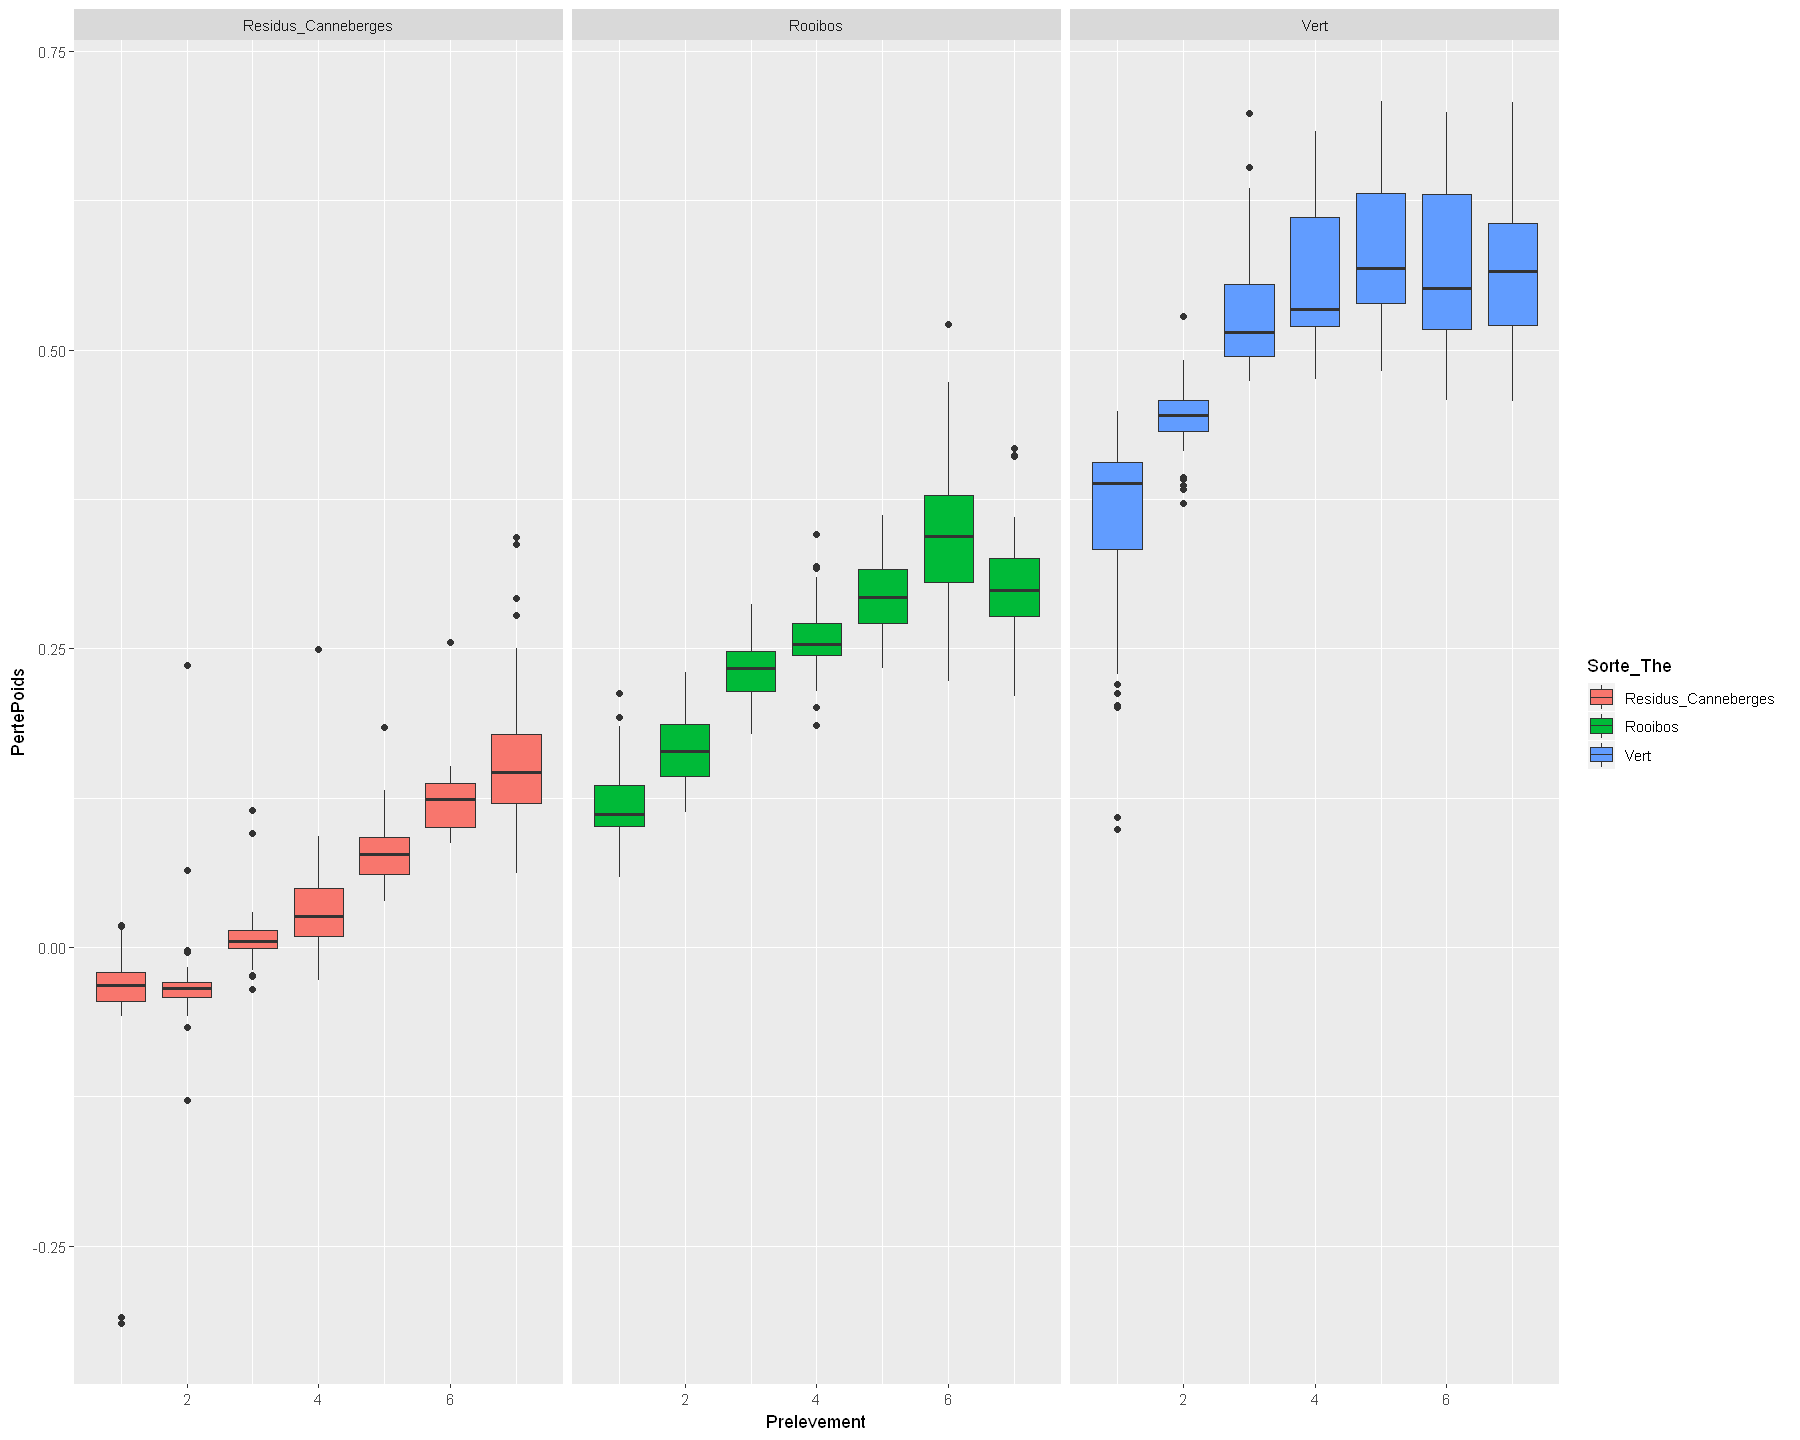

In [12]:
options(repr.plot.width=15, repr.plot.height=12)
ggplot(data = data,
       mapping = aes(x = Prelevement, y = PertePoids)) +
  facet_grid( .~ Sorte_The , scales = "free") +
  geom_boxplot(mapping = aes(fill = Sorte_The, group = Prelevement))

### Label repetitions in such a way they are unique per field and dose

In [13]:
data$DoseRepPrel = paste0(data$Dosage_N, '_', data$Repetition,'_', data$Site, '_', 
                            data$Prelevement)

### Cranberry residues are the reference to assess the effect of the kind of matter analysed

In [14]:
data$Sorte_The <- as.factor(data$Sorte_The)
data$Sorte_The = relevel(data$Sorte_The, ref = 'Residus_Canneberges')

MODELISATION MIXTE 
1. What's affecting weight difference?
 prepare data

In [61]:
weightdiff_data = data %>%
  select(PertePoids,#C_over_N,
         Sorte_The,Initial_Poids_Echantillon_g,Final_Poids_Echantillon_g,Producteur, Prelevement, Site, DoseRepPrel) %>%
  drop_na(.) %>%
  droplevels(.)

### Median computing

In [62]:
weightdiff_data_median <- aggregate(PertePoids ~ Prelevement + Sorte_The, data = weightdiff_data, FUN = median)

In [65]:
data_fiber_join <- left_join(weightdiff_data_median, data_fiber2, by = c('Prelevement', 'Sorte_The'))

Warning message:
"Column `Sorte_The` joining factors with different levels, coercing to character vector"

# Mixte model

In [82]:
data_mm <- lme(fixed = PertePoids ~ Sorte_The + Prelevement, #C_over_N + 
                     random = ~ 1 | Producteur/Site, #/DoseRep,
                     data = weightdiff_data)

In [83]:
summary(data_mm)

Linear mixed-effects model fit by REML
 Data: weightdiff_data 
        AIC       BIC   logLik
  -2553.638 -2520.226 1283.819

Random effects:
 Formula: ~1 | Producteur
        (Intercept)
StdDev:   0.0207788

 Formula: ~1 | Site %in% Producteur
        (Intercept)   Residual
StdDev:  0.01416963 0.05458996

Fixed effects: PertePoids ~ Sorte_The + Prelevement 
                      Value   Std.Error  DF   t-value p-value
(Intercept)      -0.0917054 0.017040211 871  -5.38170       0
Sorte_TheRooibos  0.1988221 0.004609345 871  43.13457       0
Sorte_TheVert     0.4691725 0.004645562 871 100.99372       0
Prelevement       0.0344954 0.000916969 871  37.61890       0
 Correlation: 
                 (Intr) Srt_TR Srt_TV
Sorte_TheRooibos -0.145              
Sorte_TheVert    -0.147  0.555       
Prelevement      -0.207 -0.031 -0.015

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-5.55224398 -0.55052333 -0.02433708  0.51022065  4.20974273 

N

In [84]:
anova(data_mm)

,numDF,denDF,F-value,p-value
(Intercept),1,871,291.6975,0
Sorte_The,2,871,5263.9435,0
Prelevement,1,871,1415.1819,0


In [96]:
summary(data_mm)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),-0.09170535,0.0170402114,871,-5.381703,9.490172e-08
Sorte_TheRooibos,0.19882213,0.0046093451,871,43.134572,2.156845e-218
Sorte_TheVert,0.46917254,0.0046455616,871,100.993719,0.000000e+00
Prelevement,0.03449536,0.0009169688,871,37.618903,1.049093e-184


In [100]:
pseudoR2(y = weightdiff_data$PertePoids,
         y_hat = predict(data_mm, level = 2))

[1] 0.9324009

Warning message:
"package 'e1071' is in use and will not be installed"

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.94002, p-value < 2.2e-16

[1] "Kurtosis: 4.12969365756344"
[1] "Skewness: -0.282414722139155"


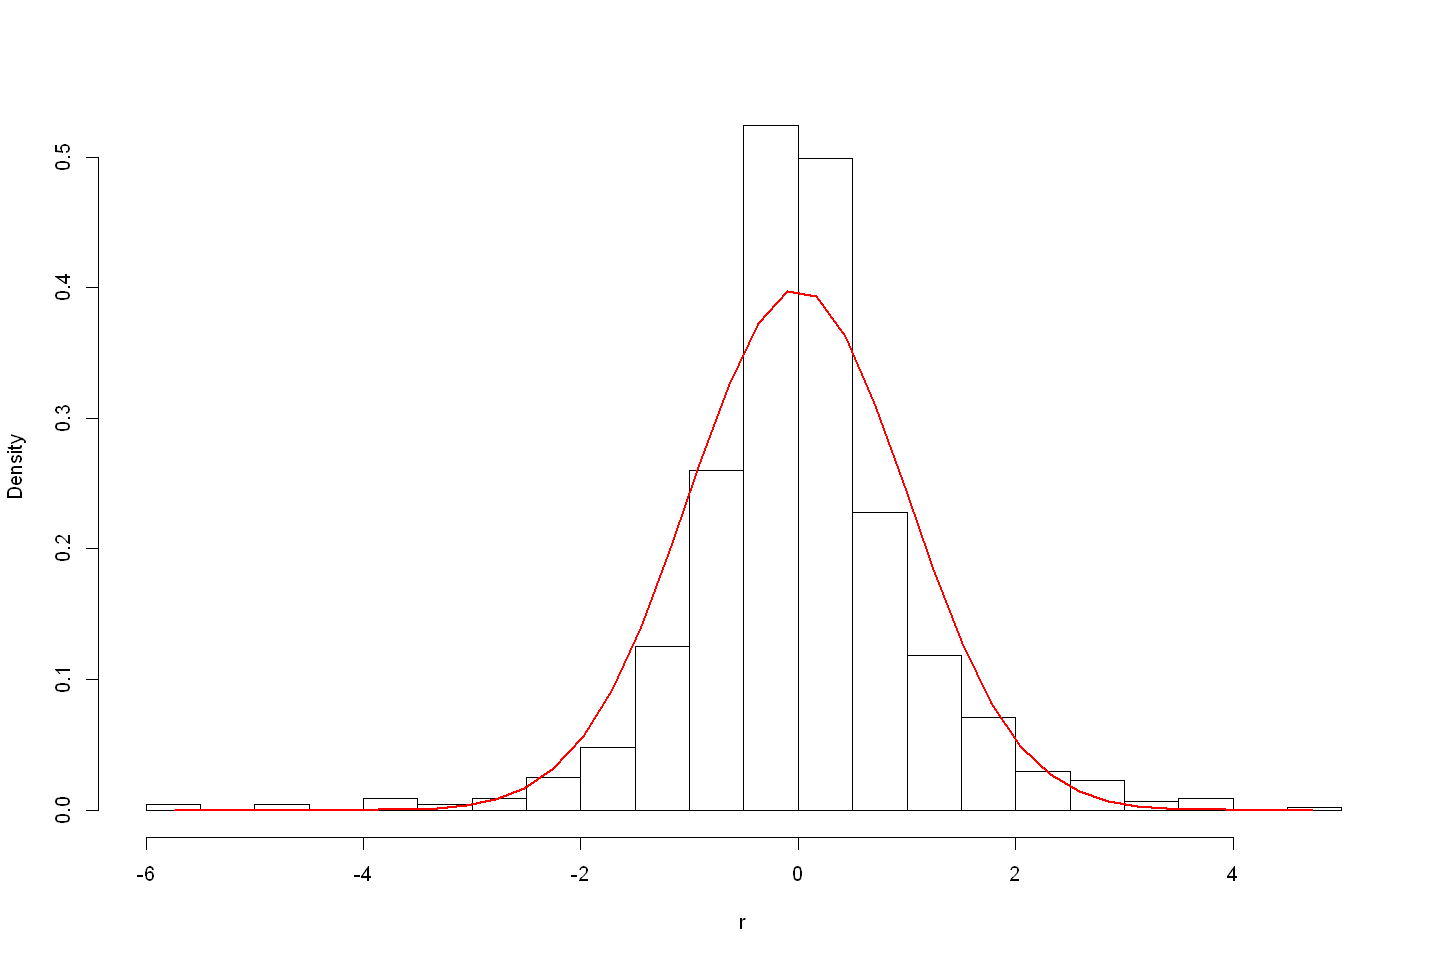

In [93]:
install.packages('e1071')
library('e1071')
residues(data_mm)

In [94]:
library(ggplot2)

In [75]:
donnee_mean_sd <- data.frame(aggregate(PertePoids ~ Prelevement + Sorte_The , data = data, FUN = mean),
                            sd = aggregate(PertePoids ~ Prelevement +  Sorte_The, data = data, FUN = sd))

In [76]:
head(donnee_mean_sd)

Prelevement,Sorte_The,PertePoids,sd.Prelevement,sd.Sorte_The,sd.PertePoids
1,Residus_Canneberges,-0.04251073,1,Residus_Canneberges,0.06465228
2,Residus_Canneberges,-0.02798317,2,Residus_Canneberges,0.05155262
3,Residus_Canneberges,0.00883064,3,Residus_Canneberges,0.02672115
4,Residus_Canneberges,0.03712390,4,Residus_Canneberges,0.04649643
5,Residus_Canneberges,0.08236305,5,Residus_Canneberges,0.02885434
6,Residus_Canneberges,0.12582183,6,Residus_Canneberges,0.03683526


In [77]:
donnee_mean_sd$sd.Prelevement<- NULL
donnee_mean_sd$sd.Sorte_The <- NULL

In [78]:
head(donnee_mean_sd)

Prelevement,Sorte_The,PertePoids,sd.PertePoids
1,Residus_Canneberges,-0.04251073,0.06465228
2,Residus_Canneberges,-0.02798317,0.05155262
3,Residus_Canneberges,0.00883064,0.02672115
4,Residus_Canneberges,0.03712390,0.04649643
5,Residus_Canneberges,0.08236305,0.02885434
6,Residus_Canneberges,0.12582183,0.03683526


In [79]:
colnames(donnee_mean_sd)[4]<- 'sd' 

In [80]:
head(donnee_mean_sd)

Prelevement,Sorte_The,PertePoids,sd
1,Residus_Canneberges,-0.04251073,0.06465228
2,Residus_Canneberges,-0.02798317,0.05155262
3,Residus_Canneberges,0.00883064,0.02672115
4,Residus_Canneberges,0.03712390,0.04649643
5,Residus_Canneberges,0.08236305,0.02885434
6,Residus_Canneberges,0.12582183,0.03683526


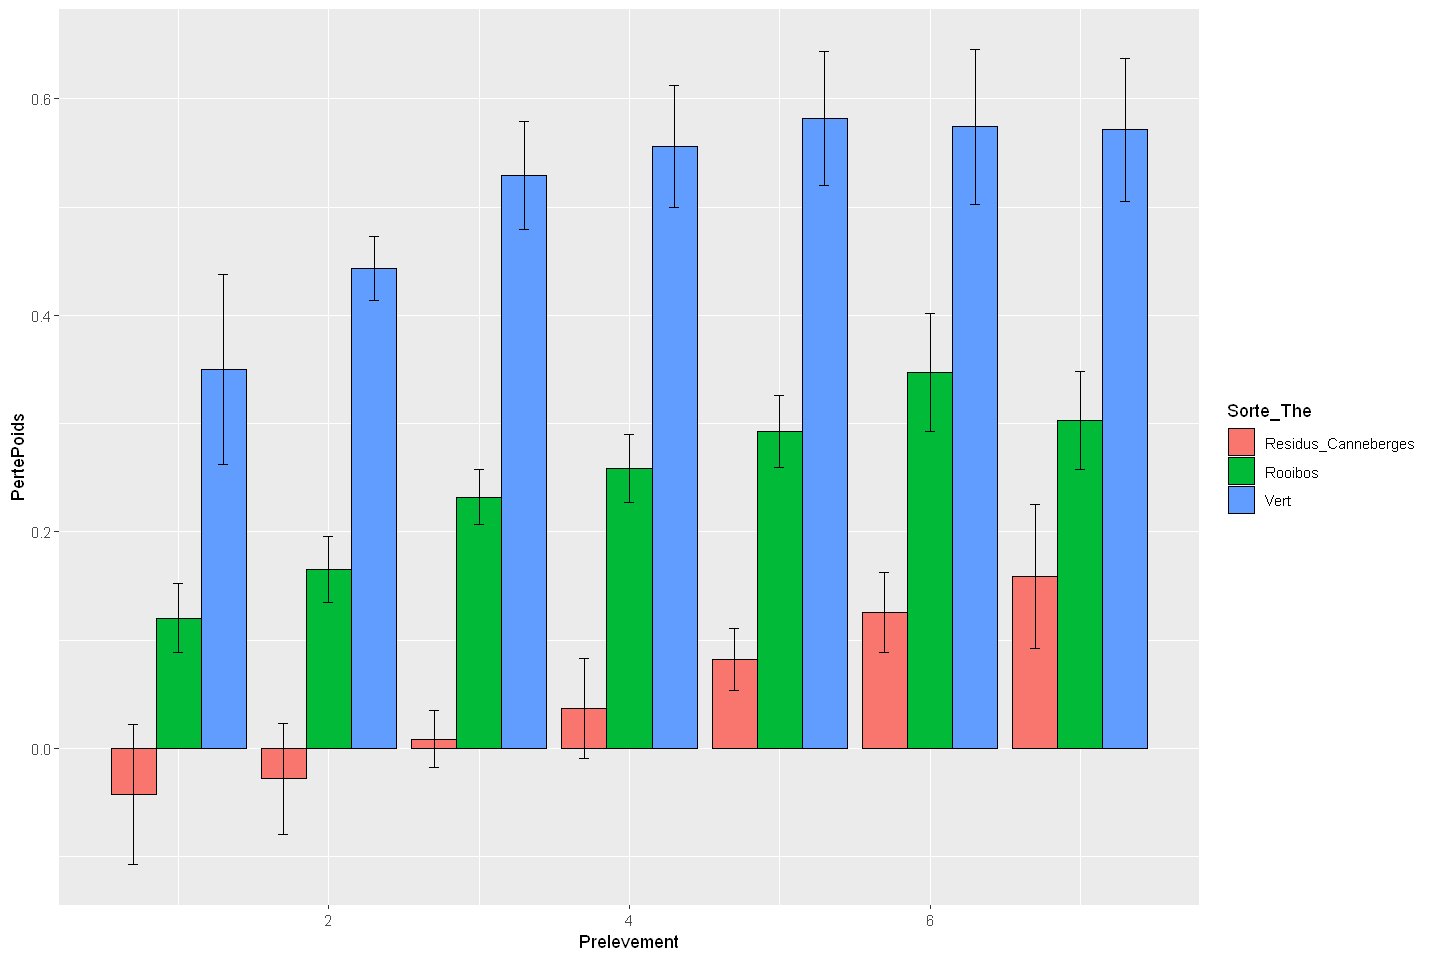

In [81]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(data=donnee_mean_sd, aes(x=Prelevement, y=PertePoids, fill=Sorte_The)) + 
  geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=PertePoids-sd, ymax=PertePoids+sd), width=.2,
                 position=position_dodge(.9)) 

# FRACTAL KINETICS

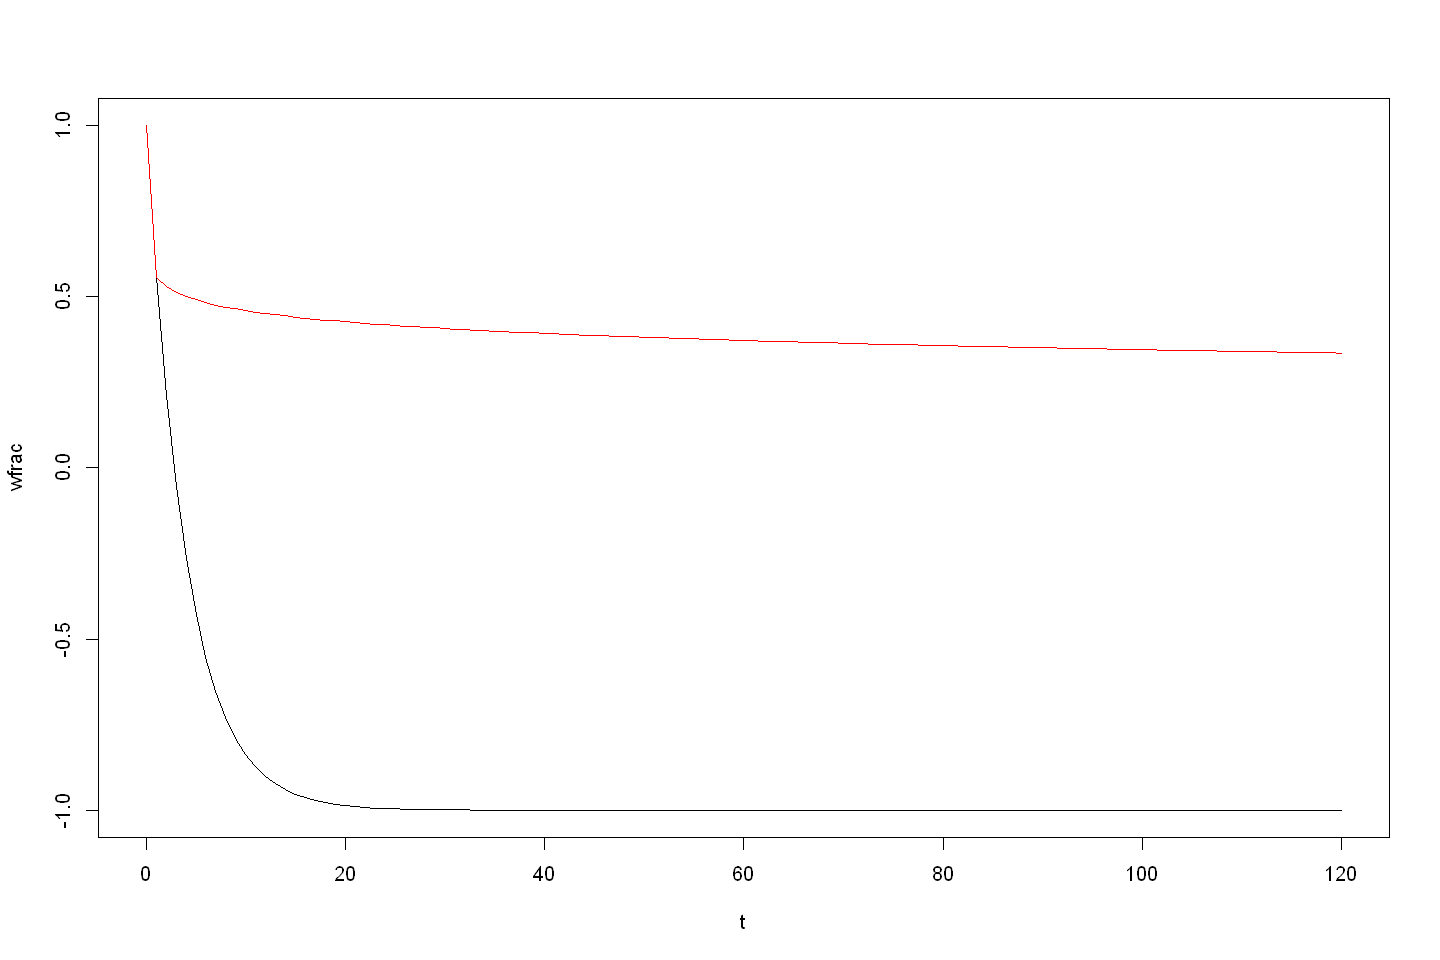

In [49]:
# vérifier comment le modèle se comporte
wfrac_f <- function(a, k, t, h) a*exp(-k*t^(1-h)) + (1-a)
t <- seq(0, 120, 1)
wfrac <- wfrac_f(a = 2, k = 0.25, t = t, h = 0)
plot(t, wfrac, type='l')
lines(t, wfrac_f(a = 2, k = 0.25, t = t, h = 0.9), col = 'red')

Nonlinear regression model
  model: W ~ a * exp(-k * t^(1 - h)) + (1 - a)
   data: df
     a      k      h   .lin 
0.7831 0.0405 0.1316 1.0003 
 residual sum-of-squares: 0.0007585

Number of iterations to convergence: 8 
Achieved convergence tolerance: 2.896e-07

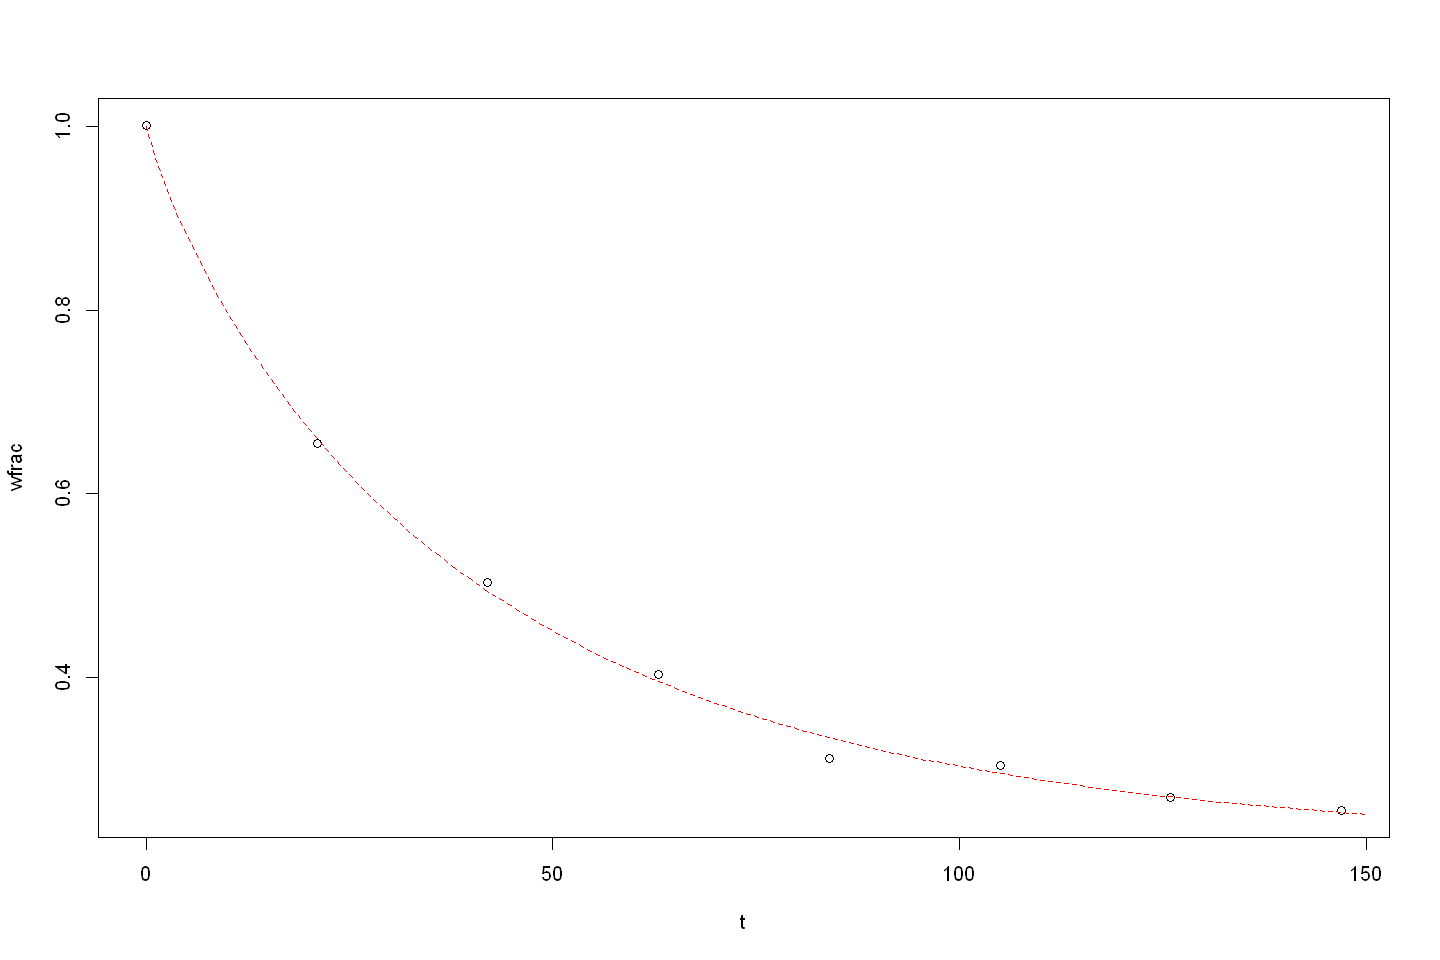

In [50]:
# lisser le modèle non linéaire
t <- seq(0, 7, 1) *21
wfrac <- wfrac_f(a = 0.8, k = 0.05, t = t, h = 0.2) + rnorm(length(t), 0, 0.01)
plot(t, wfrac)
df <- data.frame(t, W = wfrac)
md_nl <- nls(W ~ a*exp(-k*t^(1-h)) + (1-a),
data = df,
start = list(a = 0.5, k = 0.02, h = 0.3),
algorithm = "plinear")
md_nl
newdata = data.frame(t = 0:150)
W_fit <- predict(md_nl, newdata = newdata)
lines(newdata$t, W_fit, col = "red", lty = 2)

In [ ]:
donnee_2018$M_surM0 <- donnee_2018$Final_Poids_Echantillon_g / donnee_2018$Initial_Poids_Echantillon_g

In [ ]:
date <- as.Date(c("05/14/2018", "06/04/2018", "06/25/2018", "07/16/2018", "08/06/2018",
                "08/27/2018", "09/17/2018", "10/08/2018"), format = "%m/%d/%Y")


In [ ]:
#donnee_2018

In [ ]:
Prélèvement <- 0:7

In [ ]:
donnee0 <- data.frame(date, Prélèvement)

In [ ]:
donnee0

In [ ]:
donnee2 <- left_join(donnee1, donnee0, by = "Prélèvement")

In [ ]:
is_na <- is.na(donnee2_Rooibos$Mt) | is.na(donnee2_Rooibos$M0)

In [ ]:
any(0.598/((donnee2_Rooibos$Mt[!is_na]/donnee2_Rooibos$M0[!is_na]) - 1 + 0.598) < 0)

In [ ]:
donnee2_Rooibos$k_t <- log(0.598/((donnee2_Rooibos$Mt/donnee2_Rooibos$M0) - 1 + 0.598))/as.numeric(donnee2_Rooibos$Time)

In [ ]:
plot(donnee2_Rooibos$Time, donnee2_Rooibos$k_t)

In [ ]:
?dates

In [ ]:
betterDates <- as.Date(dates,
format = "%m %d %Y")

#> betterDates
#[1] "1984-05-27" "2005-07-07"

In [ ]:
betterDates

In [ ]:
head(donnee_2018)

In [ ]:
Hf_g = 0.805 #pour nos donnee
Hf_r = 0.826

In [ ]:
donnee_2018$a = NA
donnee_2018$k_tbi = NA

In [ ]:
donnee_2018$a[donnee_2018$TeaType == "Green tea"] = (donnee_2018$Poids_Contenu..g.[donnee_2018$TeaType == "Green tea"] -
                                            donnee_2018$Poids_final_g[donnee_2018$TeaType == "Green tea"]) /
                                            donnee_2018$Poids_Contenu..g.[donnee_2018$TeaType == "Green tea"]

In [ ]:
donnee_2018$S = 1 - donnee_2018$a/Hf_g

In [ ]:
#head(donnee_2018$S)

In [ ]:
sdr = paste(donnee_2018$Site, donnee_2018$Prélèvement, donnee_2018$Repetition)
sdr_u = unique(sdr)

In [ ]:
#sdr_u

In [ ]:
for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee_2018$S[sdr == sdr_u[i] & donnee_2018$TeaType == "Green tea"], na.rm = TRUE)
  
  # Rooibos
  donnee_2018$a[sdr == sdr_u[i] & donnee_2018$TeaType == "Rooibos tea"] = Hf_r * (1 - Sg_i)
  ar_i = donnee_2018$a[sdr == sdr_u[i] & donnee_2018$TeaType == "Rooibos tea"]
  M_surM0_i = donnee_2018$M_surM0[sdr == sdr_u[i] & donnee_2018$TeaType == "Rooibos tea"]
  donnee_2018$k_tbi[sdr == sdr_u[i] & donnee_2018$TeaType == "Rooibos tea"] = log(ar_i / (M_surM0_i - (1-ar_i))) / 90
  
  
}

In [ ]:
TBI_data_2018 = donnee_2018 %>%
  select(k_tbi, TeaType, Farmers,Prélèvement, Site, a) %>%
  drop_na(.) %>%
  droplevels(.)

lme_TBI_2018 <- lme(fixed = k_tbi ~ Prélèvement,
    random = ~ 1 | Farmers/Site, #/DoseRep,
    data = TBI_rooibos) # [omdecomp_data$TauxDecomposition_C > 0, ]

In [ ]:
head(TBI_data_2018) 

In [ ]:
# vérifier comment le modèle se comporte
wfrac_f <- function(a, k, t, h) a*exp(-k*t^(1-h)) + (1-a)
t <- seq(0, 120, 1)
wfrac <- wfrac_f(a = 2, k = 0.25, t = t, h = 0)
plot(t, wfrac, type='l')
lines(t, wfrac_f(a = 2, k = 0.25, t = t, h = 0.9), col = 'red')

In [ ]:
# lisser le modèle non linéaire
t <- seq(0, 7, 1) *21

In [ ]:
wfrac <- wfrac_f(a = 0.8, k = 0.05, t = t, h = 0.2) + rnorm(length(t), 0, 0.01)

In [ ]:
plot(t, wfrac)

In [ ]:
df <- data.frame(t, W = TBI_data_2018)

In [ ]:
plot(df$t, df$W.k_tbi)

In [ ]:
md_nl <- nls(W.k_tbi ~ a*exp(-k*t^(1-h)) + (1-a),
             data = df,
             start = list(a = 0.5, k = 0.02, h = 0.3),
             algorithm = "plinear")

In [ ]:
md_nl
newdata = data.frame(t = 0:150)
W_fit <- predict(md_nl, newdata = newdata)
lines(newdata$t, W_fit, col = "red", lty = 2)

In [ ]:
head(donnee_2018)

In [ ]:
install.packages("fractal")

In [ ]:
install.packages("splus2R")
library("splus2R")

In [ ]:
install.packages("ifultools")
library("ifultools")

In [ ]:
install.packages("akima")
library("akima")

In [ ]:
library("fractal")

In [ ]:
?KDE

In [ ]:
n.sample <- c(1000, 500, 300)
n.sample

In [ ]:
ind      <- rep(1:3, n.sample)

In [ ]:
x <- rmvnorm(sum(n.sample),
    mean = rbind(c(-10,-20), c(10,0), c(0,0))[ ind, ],
    sd   = rbind(c(5,3), c(1,3) , c(0.3,1))[ ind, ],
    rho  = c(0.5, 1, -0.4)[ind])
x

In [ ]:
## perform the KDE 
z <- KDE(x)
print(z)

In [ ]:
## plot a summary of the results 
eda.plot(z)

In [ ]:
P <- na.omit(donnee_2018 %>% select(Date_Retrait, PertePoids))

In [ ]:
H <- RoverS(P$Date_Retrait)

In [ ]:
q <- RoverS(P$PertePoids)

In [ ]:
q

In [ ]:
H

In [ ]:
 {
RoverS(wmtsa::ocean)

In [ ]:
## form KDE of beamchaos series 
plot(KDE(beamchaos),type="l")